In [50]:
!pip install datasets
!pip install evaluate
!pip install fsspec==2023.9.2


⚙️ **Requerimientos importantes sobre el ejercicio**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.



## Imports

In [51]:
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
# Add your imports here
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

# 🔍 Ejercicio1: Detección de profesiones en tweets

## Enunciado

En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Utilizaremos un subconjunto de los datos de la tarea 1 del shared task [**ProfNER**](https://temu.bsc.es/smm4h-spanish), centrada en la detección de menciones a profesiones en tweets publicados durante la pandemia del COVID-19. El objetivo original de la tarea era analizar que profesiones podrían haber sido especialmente vulnerables en el contexto de la crisis sanitaria.

Para simplificar el ejercicio, he preparado una versión reducida del dataset original. Tu tarea será entrenar un clasificador binario basado en la arquitectura Transformers, que, dado un tweet, determine si contiene una mención explícita a una profesión (etiqueta `1`) o no (etiqueta `0`).




✅ **Objetivos del ejercicio**

A lo largo de este notebook, completarás las siguientes etapas para construir un clasificador de menciones a profesiones en tweets:

1. **Análisis Exploratorio de Datos (EDA)**: Calcular estadísticas básicas del conjunto de datos (como el número de ejemplos del training set, la distribución de clases del dataset, la longitud media de los textos) o crear visualizaciones para cmprender mejor el contenido de los documentos usando wordclouds o histogramas.

2. **Selección y justificación del modelo**: Elegir un modelo del Hub de Huggingface adecuado para los datos con los que se va a trabajar y el tipo de tarea a desarrollar.

3. **Entrenamiento del clasificador**: Entrenar el modelo de forma reproducible y evaluar su rendimiento sobreel conjunto de datos de validación, incluyendo un classification score y matriz de confusion

4. **Generación de predicciones sobre el conjunte de test**: Aplicar el modelo entrenado al conjunto de test, y guardar las predicciones en un archivo `.tsv` de 2 columnas `id` y `label` separadas por tabulador

📝 **Criterios de Evaluación**

Tu trabajo será evaluado según los siguientes criterios:

| Criterio                                            | Peso  |
|-----------------------------------------------------|--------|
| 🔍 Análisis exploratorio y preprocesamiento         | 20%   |
| 🤖 Selección y justificación del modelo             | 25%   |
| 📁 Formato y validez del archivo de predicciones    | 5%    |
| ⚙️ Ejecución correcta del notebook (sin intervención) | 10%   |
| 📈 Rendimiento del modelo sobre el conjunto de test | 30%   |
| ✍️ Claridad y calidad de las explicaciones          | 10%   |



🔔 **Nota importante:**

> El rendimiento del modelo se evaluará utilizando métricas estándar como el **F1-score** sobre el conjunto de test.

> El archivo de predicciones debe respetar **estrictamente** el formato solicitado (`id` y `label`, separados por tabulador y con extensión `.tsv`).  
  ❗ Si el archivo no cumple con este formato, **el ejercicio no podrá ser evaluado en esa sección**.

> El/la estudiante con el **mayor F1-score** obtendrá la puntuación máxima en el apartado de rendimiento. El resto de calificaciones se ajustarán de forma proporcional al mejor resultado



⚙️ **Requerimientos y reglas**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.


# Tu resolución (rellena las celdas marcadas)

## Obtención de datos

Descargamos los datos del [repositorio de Huggingface](https://huggingface.co/datasets/luisgasco/profner_classification_master).

In [53]:
#NO-MODIFY: DATA LOAD
from datasets import load_dataset, Dataset, DatasetDict, ClassLabel
dataset = load_dataset("luisgasco/profner_classification_master")

El dataset contiene tres subsets:
- **train** y **validation**: Contienen el identificador del tweet, el texto, y su etiqueta, que podrá tener valor 1, si contiene una mención de una profesión; o valor 0, si no contiene una mención de una profesión.
- **test**: El test set tambiíen contiene la información de label por un requerimiento de Huggingface, pero el contenido de esta variable es siempre "-1". Es decir que deberéis predecir nuevas etiquetas una vez hayáis entrenado el modelo utilizando el train y el validation set.

## Análisis exploratorio de datos

Para hacer el análisis exploratorio de datos, transformamos cada subset a un pandas dataframe para mayor comodidad.

In [54]:
#NO-MODIFY: DATA LOAD
dataset_train_df = dataset["train"].to_pandas()
dataset_val_df = dataset["validation"].to_pandas()
dataset_test_df = dataset["test"].to_pandas()
#print(dataset_train_df)

**Número de documentos**

Obten con la función `get_num_docs_evaluation()` el número de documentos del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [55]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def get_num_docs_evaluation(dataset_df):
  # Modifica la función.
  num_docs= len (dataset_df)
  # No modifiques el return
  return num_docs

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [56]:
# Aplica la función
num_train_docs = get_num_docs_evaluation(dataset_train_df)
num_val_docs = get_num_docs_evaluation(dataset_val_df)
num_test_docs = get_num_docs_evaluation(dataset_test_df)
print(f"Número de documentos en el training set: {num_train_docs}")
print(f"Número de documentos en el validation set: {num_val_docs}")
print(f"Número de documentos en el test set: {num_test_docs}")

Número de documentos en el training set: 2786
Número de documentos en el validation set: 999
Número de documentos en el test set: 1001


Comentarios: **- Training set: 2,786 documentos
- Validation set: 999 documentos
- Test set: 1,001 documentos
La partición del dataset es adecuada: la mayor parte se destina al entrenamiento,
mientras que los conjuntos de validación y prueba tienen tamaños similares y razonables.
Esto permite una evaluación fiable del rendimiento del modelo sin sobreajustarlo.**

**Número de documentos duplicados**

Obten con la función `detect_duplicates_evaluation()` el número de documentos duplicados del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [57]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def detect_duplicates_evaluation(dataset_df):
  # Modifica la función.
  num_duplicates=dataset_df.duplicated().sum()

  # No modifiques el return
  return num_duplicates

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [58]:
# Aplica la función
num_train_duplicates = detect_duplicates_evaluation(dataset_train_df)
num_val_duplicates = detect_duplicates_evaluation(dataset_val_df)
num_test_duplicates = detect_duplicates_evaluation(dataset_test_df)
print(f"Número de documentos duplicados en el training set: {num_train_duplicates}")
print(f"Número de documentos duplicados en el validation set: {num_val_duplicates}")
print(f"Número de documentos duplicados en el test set: {num_test_duplicates}")

Número de documentos duplicados en el training set: 0
Número de documentos duplicados en el validation set: 0
Número de documentos duplicados en el test set: 0


 ** Resultados, comentarios:
- Training set: 0 documentos duplicados
- Validation set: 0 documentos duplicados
- Test set: 0 documentos duplicados
Conclusión: No se han encontrado duplicados en ninguno de los subconjuntos,
lo que indica una correcta separación de los datos y una buena calidad del dataset.*

**Número de documentos por cada clase:**


Obten con la función `analyse_num_labels_evaluation()` para calcular el número de documentos de cada categoría en el dataset

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [59]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def analyse_num_labels_evaluation(dataset_df):
  # Modifica la función.
  label_counts = dataset_df['label'].value_counts().to_dict()
  num_positives = label_counts.get(1,0)
  num_negatives = label_counts.get(0,0)

  # No modifiques el return
  return num_positives, num_negatives

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [60]:
# Aplica la función
num_positives_train, num_negatives_train = analyse_num_labels_evaluation(dataset_train_df)
num_positives_val, num_negatives_val = analyse_num_labels_evaluation(dataset_val_df)
num_positives_test, num_negatives_test = analyse_num_labels_evaluation(dataset_test_df)

print(f'Train - Número de documentos positivos: {num_positives_train}')
print(f'Train - Número de documentos negativos: {num_negatives_train}')

print(f'Validation - Número de documentos positivos: {num_positives_val}')
print(f'Validation - Número de documentos negativos: {num_negatives_val}')

print(f'Test - Número de documentos positivos: {num_positives_test}')
print(f'Test - Número de documentos negativos: {num_negatives_test}')


Train - Número de documentos positivos: 1393
Train - Número de documentos negativos: 1393
Validation - Número de documentos positivos: 238
Validation - Número de documentos negativos: 761
Test - Número de documentos positivos: 0
Test - Número de documentos negativos: 0


* Distribución de clases:
- Train: 1,393 positivos y 1,393 negativos →  balanceado.
- Validation: 238 positivos y 761 negativos → desbalanceado.
- Test: 0 positivos y 0 negativos.*


**Distribución de la longitud de los tweet en caracteres:**

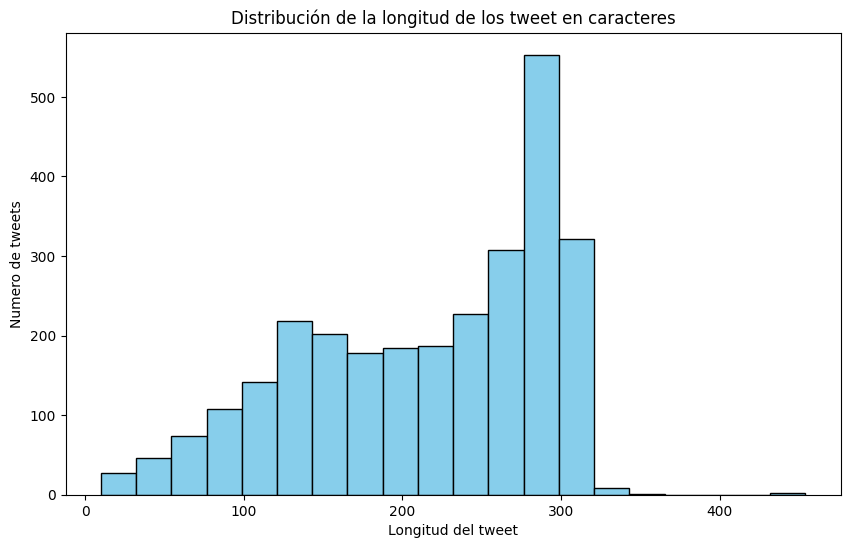

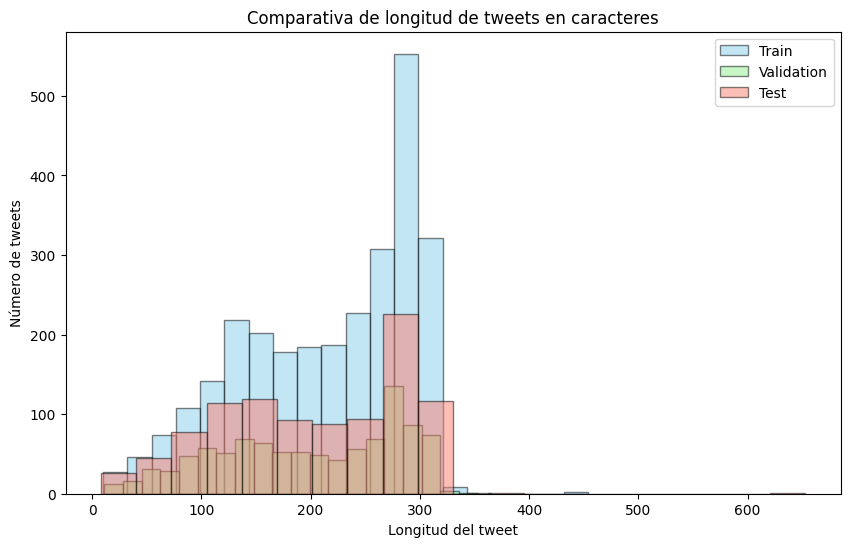

In [61]:
# 1. Calcular la longitud (numero de caracteres) de cada tweet.
# 2. Visualizar la distribución con un histograma o un boxplot.
tweet_lengths_train = dataset_train_df['text'].apply(len)
tweet_lengths_val = dataset_val_df['text'].apply(len)
tweet_lengths_test = dataset_test_df['text'].apply(len)
plt.figure(figsize=(10,6))
plt.hist(tweet_lengths_train, bins=20, color = 'skyblue', edgecolor='black')
plt.title('Distribución de la longitud de los tweet en caracteres')
plt.xlabel('Longitud del tweet')
plt.ylabel('Numero de tweets')
plt.show()

#3.Comparamos los tres datasets a acontinuación. Para ello he importado las librerias necesarias que hacen posible esa comparación que se ve abajo de manera gráfica (import matplotlib.pyplot as plt)

from wordcloud import WordCloud

plt.figure(figsize=(10,6))
plt.hist(tweet_lengths_train, bins=20, alpha=0.5, label='Train', color='skyblue', edgecolor='black')
plt.hist(tweet_lengths_val, bins=20, alpha=0.5, label='Validation', color='lightgreen', edgecolor='black')
plt.hist(tweet_lengths_test, bins=20, alpha=0.5, label='Test', color='salmon', edgecolor='black')
plt.title('Comparativa de longitud de tweets en caracteres')
plt.xlabel('Longitud del tweet')
plt.ylabel('Número de tweets')
plt.legend()
plt.show()


**Análisis de contenido de los tweets**

Para ello utiliza wordclouds

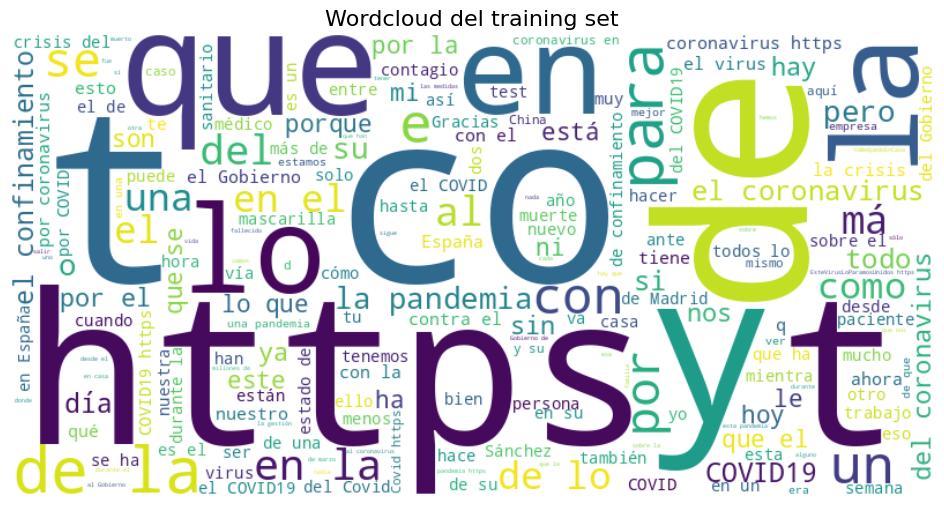

In [62]:
#se unen todoos los tweets en un único texto. Importamos: from wordcloud import WordCloud
all_text= ''.join(dataset_train_df['text'])
all_text_val= ''.join(dataset_val_df['text'])
all_text_test= ''.join(dataset_test_df['text'])

wordcloud_train = WordCloud(width=800, height=400, background_color='white').generate(all_text)
wordcloud_val = WordCloud(width=800, height=400, background_color='white').generate(all_text)
wordcloud_test = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud del training set',fontsize = 16)
plt.show()

## Tokenización

El texto del dataset no está preparado para ser introducido en un modelo Transformers. Lleva a cabo el proceso de tokenización.

In [63]:
# IMPORTS
import transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch

Selecciona un modelo apropiado para la tarea:

> Recuerda que en la siguiente celda sólo debes asignar un valor a model_name. No añadas más información en la celda.

Comentarios **He elegido el modelo "dccuchile/bert-base-spanish-wwm-cased" porque está especialmente entrenado para el idioma español, lo que mejora su capacidad para entender los tweets que vamos a clasificar.
Usa Whole Word Masking, una técnica que le ayuda a captar mejor el significado completo de palabras como profesiones.
Es cased,  distingue entre mayúsculas y minúsculas.
Compatible con Huggingface, lo que facilita su uso y entrenamiento.
Por ello, es buena opción para detectar menciones a profesiones en tweets escritos en español*

In [64]:
#NO-MODIFY: VARIABLE NAME
model_name = 'dccuchile/bert-base-spanish-wwm-cased'
tokenizer= AutoTokenizer.from_pretrained(model_name)

Puedes continuar con el proceso aquí:

In [65]:
train_encodings = tokenizer(
    dataset_train_df['text'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)
val_encodings = tokenizer(
    dataset_val_df['text'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

test_encodings = tokenizer(
    dataset_test_df['text'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)


In [66]:
train_labels= torch.tensor(dataset_train_df['label'].tolist())
val_labels= torch.tensor(dataset_val_df['label'].tolist())

In [67]:
from torch.utils.data import Dataset

class TweetDataset(Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
      return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = self.labels[idx]
        return item

In [68]:
train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, None)

Carga el model para ser ajustado posteriormente:

## Fine-tuning

In [69]:
model= AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [70]:
!pip install --upgrade transformers

### Configuracion training_args

Configura los parámetros de entrenamiento del modelo.


>

> Recuerda que en la siguiente celda sólo debes asignar atributos a la variable training_args. No añadas  otras variables en la celda

In [71]:
#NO-MODIFY: VARIABLE NAME
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8, # Reduced batch size
    per_device_eval_batch_size=64,
    num_train_epochs=1, # Reduced number of epochs
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model="f1",
)

### Métricas de evaluación

Define las métricas de evaluación

In [72]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score

In [73]:
def compute_metrics(eval_pred):
  logits,labels = eval_pred
  preds= logits.argmax(axis=-1)

  precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
  acc= accuracy_score(labels, preds)

  return {
      'accuracy': acc,
      'f1': f1,
      'precision': precision,
      'recall': recall
  }

### Ajuste del modelo

Lleva a cabo el ajuste del modelo:

In [74]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.297303,0.919920,0.847909,0.774306,0.936975


TrainOutput(global_step=349, training_loss=0.4068675218817156, metrics={'train_runtime': 106.4958, 'train_samples_per_second': 26.161, 'train_steps_per_second': 3.277, 'total_flos': 183256850058240.0, 'train_loss': 0.4068675218817156, 'epoch': 1.0})

*Comentarios: **Losresultados tras la primera época de entrenamiento muestran que el modelo está aprendiendo adecuadamente. La pérdida en entrenamiento es de aproximadamente 0.41, mientras que la pérdida en validación es menor, 0.30, lo que indica que el modelo no está sobreajustando y generaliza bien. La precisión (accuracy) en validación es alta, cerca del 92%, mostrando un buen desempeño general.

El F1 score es de 0.85, lo que indica un buen equilibrio entre precisión y recall. La precisión es un poco más baja, alrededor de 0.77, lo que sugiere que el modelo es algo conservador al identificar ejemplos positivos, pero compensa con un recall alto, cerca del 94%, capturando la mayoría de los positivos. En conjunto, estos indicadores reflejan un modelo con buen rendimiento tras una sola pasada por los datos, con margen para seguir mejorando en siguientes epochs.**

## Evaluacion

Una vez llevada a cabo el entrenamiento, realiza la evaluación del modelo.

In [75]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 0.29730305075645447, 'eval_accuracy': 0.91991991991992, 'eval_f1': 0.8479087452471483, 'eval_precision': 0.7743055555555556, 'eval_recall': 0.9369747899159664, 'eval_runtime': 6.2906, 'eval_samples_per_second': 158.807, 'eval_steps_per_second': 2.543, 'epoch': 1.0}


Comentarios: Los resultados de evaluación tras la primera época confirman un buen desempeño del modelo. La pérdida de evaluación es de aproximadamente 0.30, mostrando un ajuste adecuado sin sobreajuste. La precisión alcanza un 92%, indicando que el modelo clasifica correctamente la mayoría de los ejemplos.
El F1 score de 0.85 refleja un balance sólido entre precisión y recall, siendo la precisión alrededor de 0.77 y el recall cerca del 0.94, lo que sugiere que el modelo es más conservador al predecir positivos pero captura la mayoría de ellos. Además, la evaluación se realizó con una buena velocidad, procesando cerca de 159 muestras por segundo.



## Genera predicciones

Genera predicciones sobre el test set. Recuerda que el archivo que generes y adjuntes al ejercicio debe tener dos columnas:


| id         | label |
|------------|-------|
| 1234567890 | 1     |
| 1234567891 | 0     |
| 1234567892 | 0     |
| 1234567893 | 1     |

- El archivo debe estar en formato **TSV** (separado por tabuladores).
- Debe contener exactamente **dos columnas**: `id` y `label`.
- Es obligatorio incluir la **cabecera**.


In [76]:
predictions,_, _ = trainer.predict(test_dataset)
pred_labels= predictions.argmax(axis=-1)

import pandas as pd

submission_df = pd.DataFrame({
    'id': dataset_test_df['tweet_id'].values,
    'label': pred_labels
})
submission_df.to_csv('submission.tsv', sep='\t', index=False)

In [77]:
verifacion_df = pd.read_csv('submission.tsv', sep='\t')
print(verifacion_df.head())

                    id  label
0  1277969650051997701      1
1  1263161378627600385      0
2  1255919996779315208      0
3  1282361712117780486      0
4  1267872916009615364      0


In [78]:
from google.colab import files
files.download ('submission.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>